In [1]:
import sys

sys.path.append("../")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import torch
import anndata as ad
#sys.path.append('/home/exx/git/Tangram/')  # uncomment for local import
#import telegraph as tg
import pyreadr

%load_ext autoreload
%autoreload 2
%matplotlib inline

#tg.__version__

/gstore/home/huangh83/miniconda3/envs/tangram/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [19]:
import re
import altair as alt

In [5]:
folder_ID = os.listdir('/gstore/data/resbioai/tangram2_data/lung/spatial/')

In [50]:
ad_sc_all = sc.read_h5ad('/gstore/data/resbioai/tangram2_data/lung/single_cell/'+
                     '220715Annotated_Fetal_lung_immune_filtered_soupxcite_cxg.h5ad')

In [51]:
sc.pp.normalize_total(ad_sc_all, target_sum=1E4)
sc.pp.log1p(ad_sc_all)

In [52]:
B_split = ['HSC/MPP', 'LMPP/ELP', 'Pre-pro-B',  'Pro-B', 'Late pro-B', 'Pro-B/Pre-B transition','Large pre-B', 'κ small pre-B', 'λ small pre-B', 
          'Late pre-B','Immature B', 'CD5+ Mature B', 'CD5- Mature B']

B_marker = ['CD34', 'EBF1', 'SPINK2','VPREB1', 'DNTT', 'NEIL1', 'RAG1', 'MS4A1', 'IL7R', 'MKI67','SPIB', 'IGKC', 'IGLC2', 'IGLC3',
            'IGLL1','IGHD','IGHM','VPREB3', 'BEST3', 'CD5','CD27', 'SPN', 'CCR10', 'CCL22', 'PRDM1']

In [53]:
B_fraction_df = pd.DataFrame(index = B_split, columns = B_marker)
B_expression_df = pd.DataFrame(index = B_split, columns = B_marker)

In [54]:
for i in B_fraction_df.index:
    for j in B_fraction_df.columns:
        B_fraction_df.loc[i, j] = (ad_sc_all[ad_sc_all.obs.celltype == i, j].X !=0).sum()/len(ad_sc_all[ad_sc_all.obs.celltype == i])
        B_expression_df.loc[i, j] = (ad_sc_all[ad_sc_all.obs.celltype == i, j].X).mean()

In [55]:
B_fraction_df.to_csv('/gstore/data/resbioai/tangram2_data/lung/B_cell_normalize/B_marker_fraction.csv')
B_expression_df.to_csv('/gstore/data/resbioai/tangram2_data/lung/B_cell_normalize/B_marker_expression.csv')

In [24]:
ad_sc_B = ad_sc_all[ad_sc_all.obs.celltype.isin(B_split)]

In [48]:
sc.pp.normalize_total(ad_sc_B, target_sum=1E4)
sc.pp.log1p(ad_sc_B)

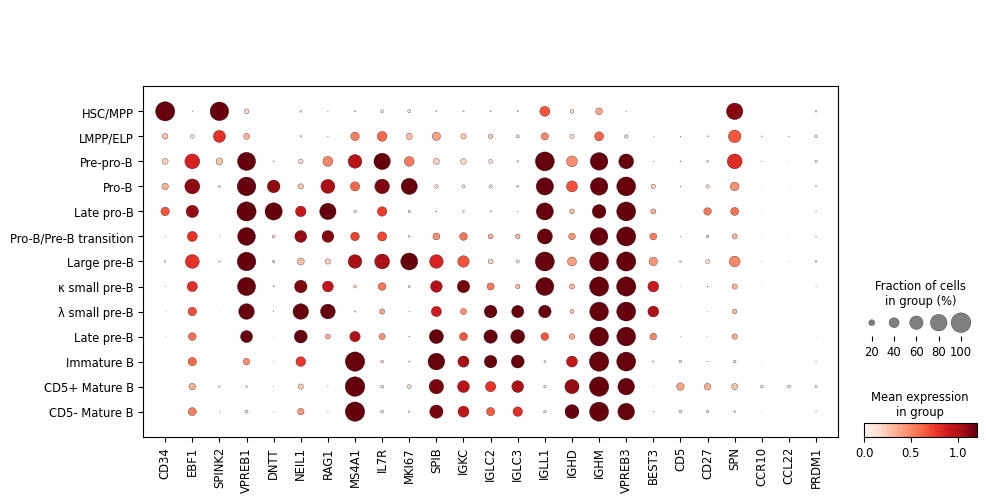

In [49]:
#sns.set(font_scale = 1.1)
sns.reset_defaults()
sc.pl.dotplot(ad_sc_B, B_marker, categories_order = B_split, groupby='celltype', vmin=0, vmax=1.2,)#, dendrogram=True)
# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16)
plt.show()


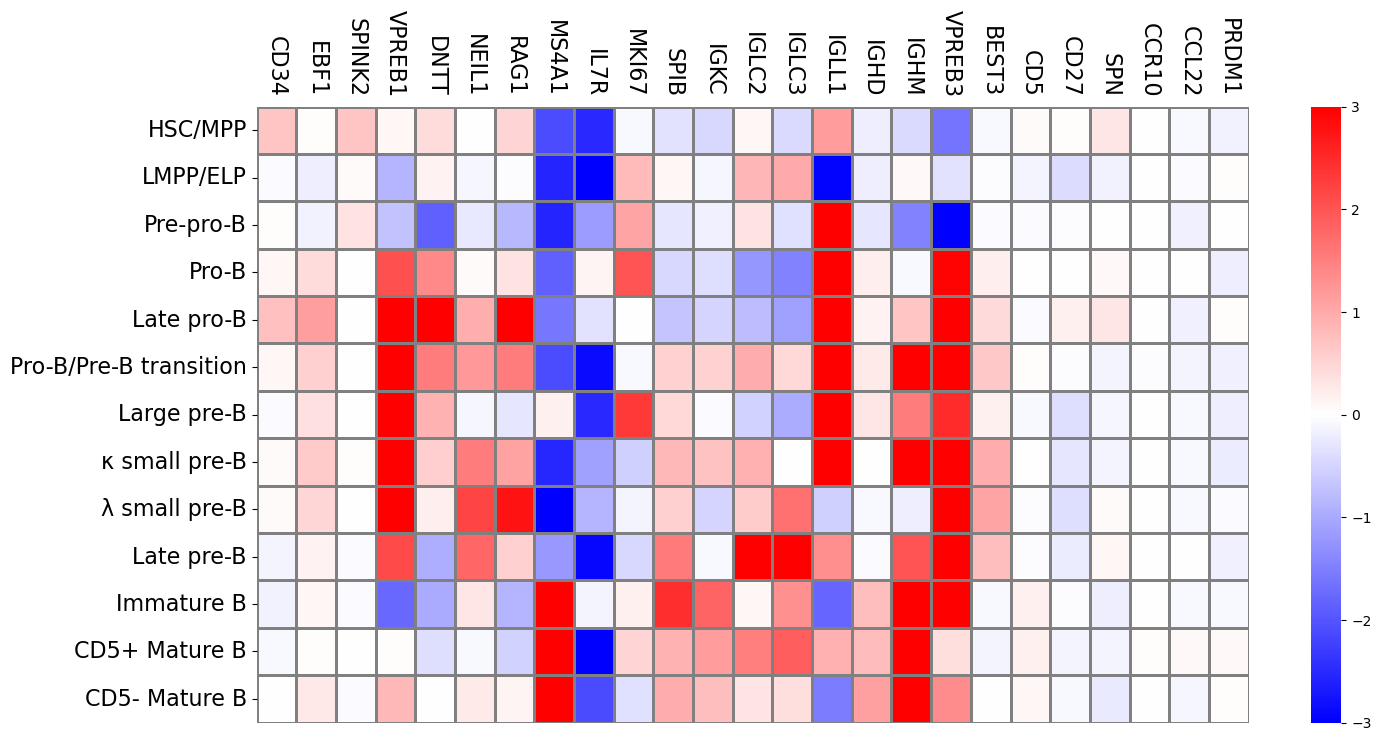

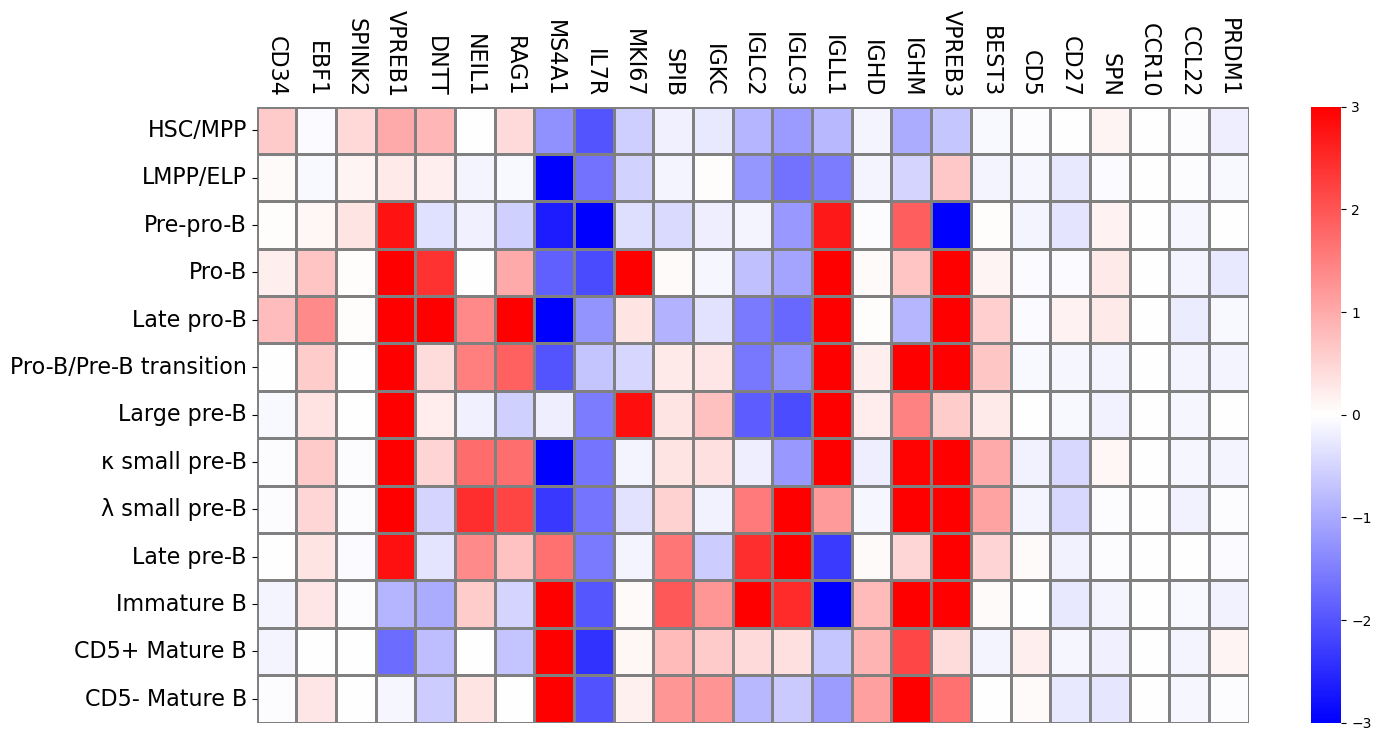

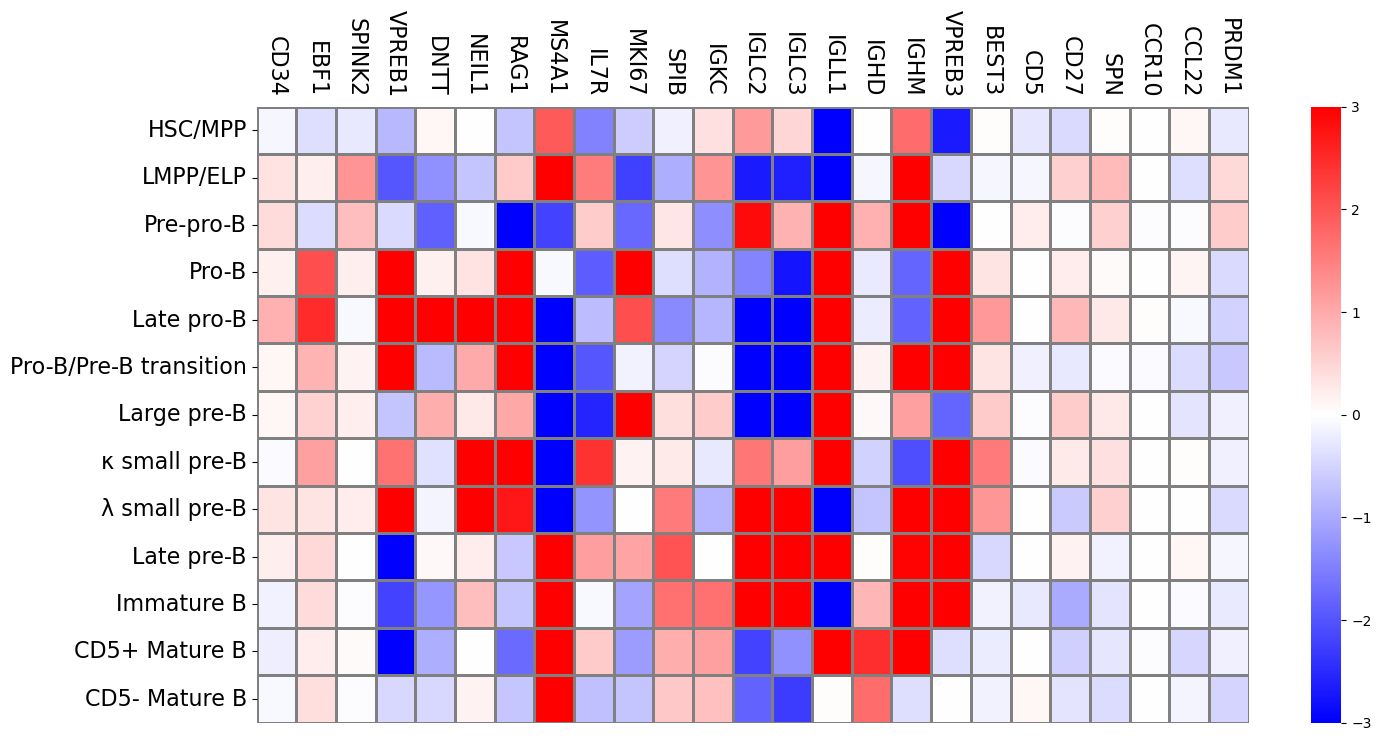

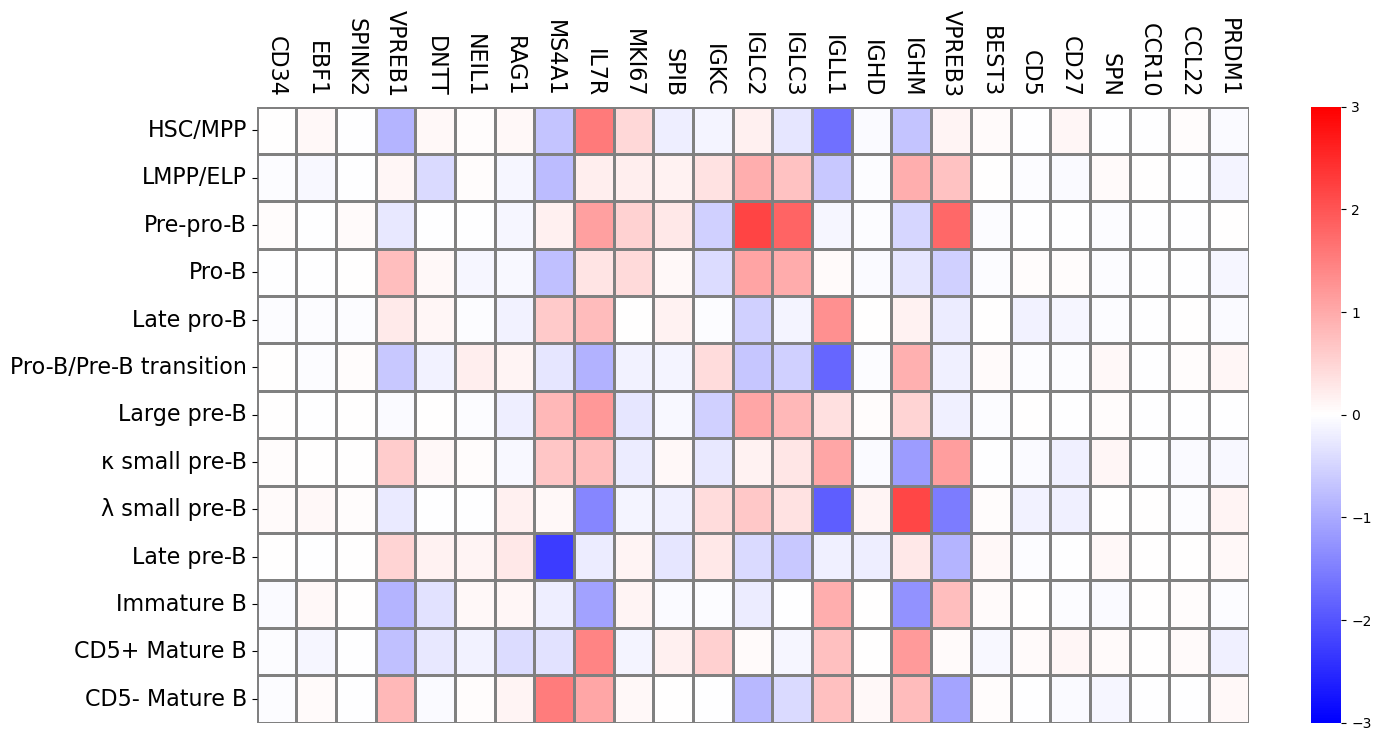

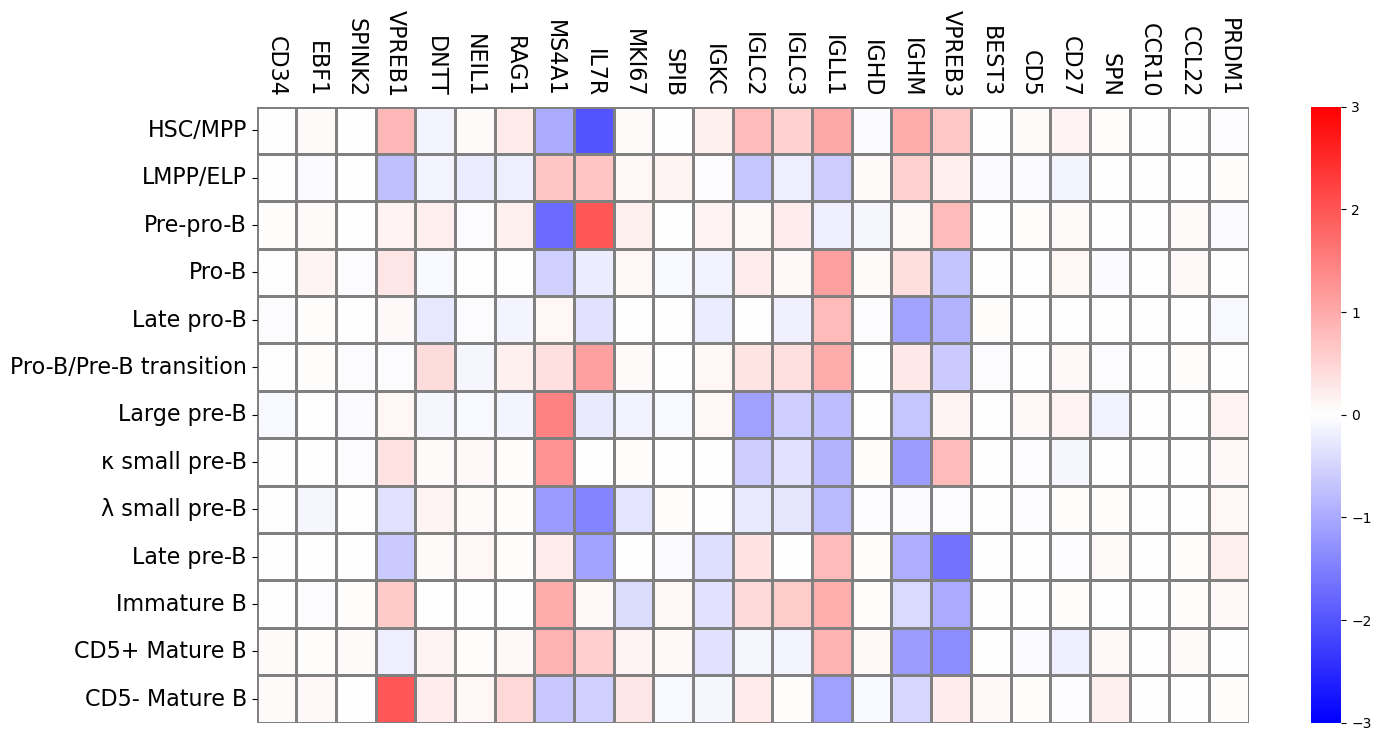

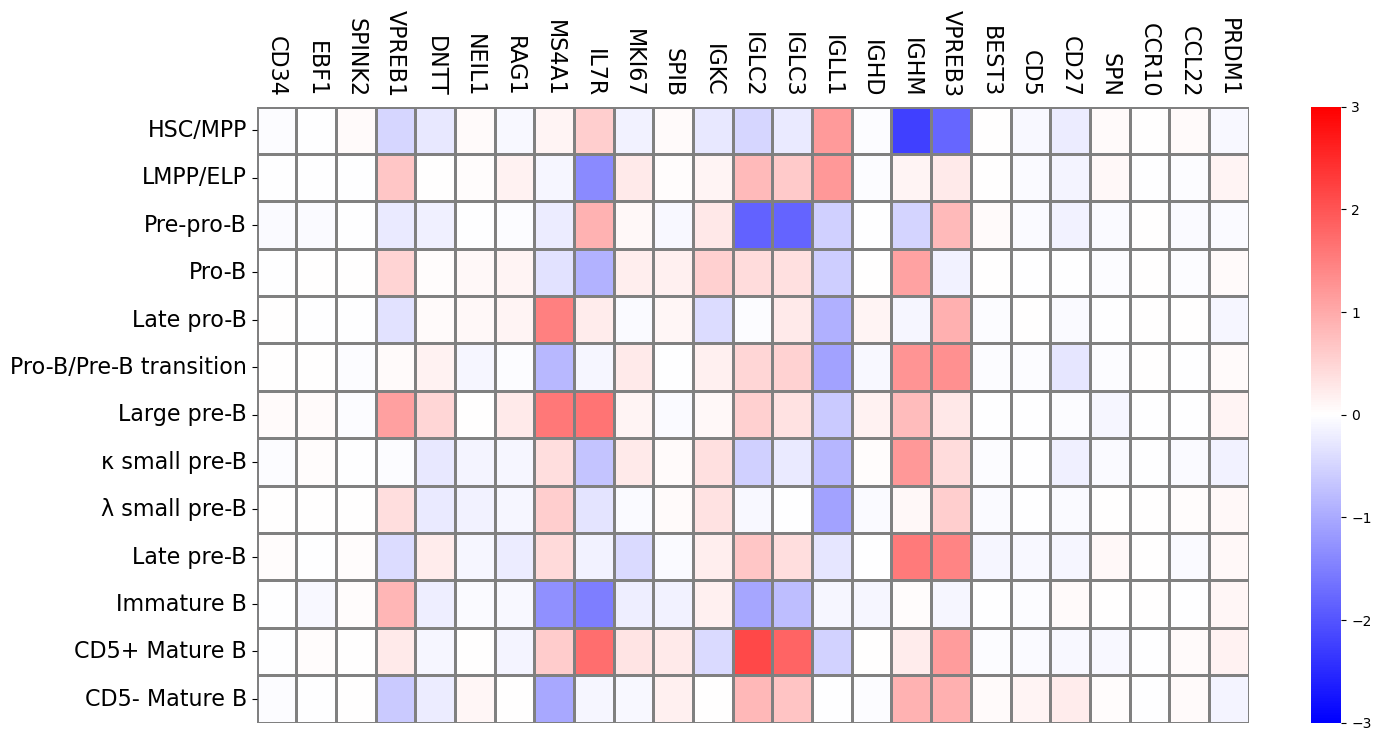

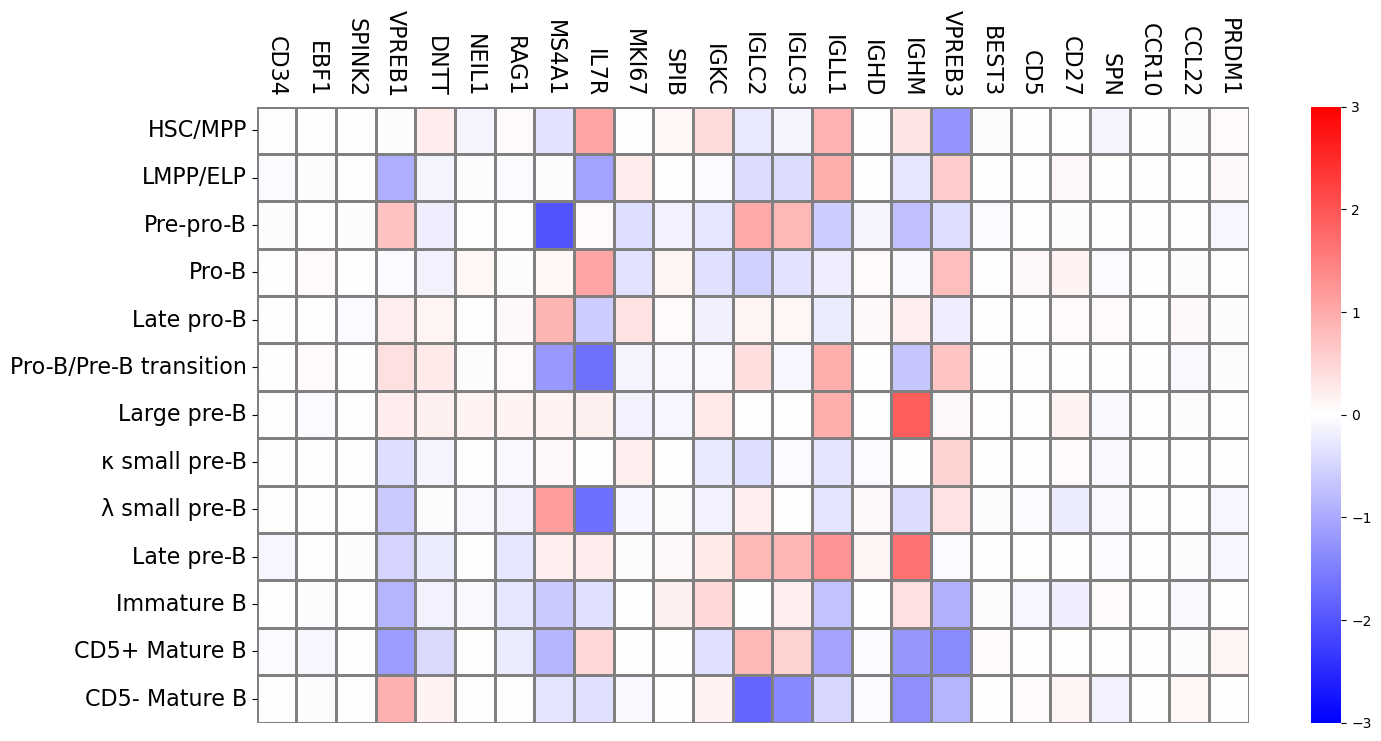

In [38]:
cancer_split = ['ILC2', 'Treg', 'CD8 T' , 'Alveolar fibro', 'TNC+ fibro', 'Adventitial fibro', 'Pericyte' ]
folder = '/gstore/data/resbioai/tangram2_data/telegraph/res/ccc_eval/real/fetal_lung/cci/celltype_raw/'

for i in range(len(cancer_split)):
    effect_celltype = cancer_split[i]
    comparison_df = pd.read_csv(folder + 'B_development/' + effect_celltype + '.csv', index_col = 0)
    plt.figure(figsize=(16, 8))
    sns.heatmap(comparison_df, cmap = 'bwr', center = 0, vmin = -3.0, vmax = 3.0, linewidths=1, linecolor='grey',)
    plt.yticks(rotation = 0)
    plt.xticks(fontsize = 18)
    plt.tick_params(labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(fontsize = 16, rotation = -90)
    plt.yticks(fontsize = 16)
    plt.show()